In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix, classification_report, 
    roc_curve, auc, mean_squared_error, r2_score
)
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

In [219]:
# Load dataset
df = load_breast_cancer()
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names

In [221]:
# Basic information
print(dataset.head())
print("Dataset shape:", dataset.shape)
print("Dataset description:\n", dataset.describe())
print("Class distribution:\n", pd.Series(df.target).value_counts())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

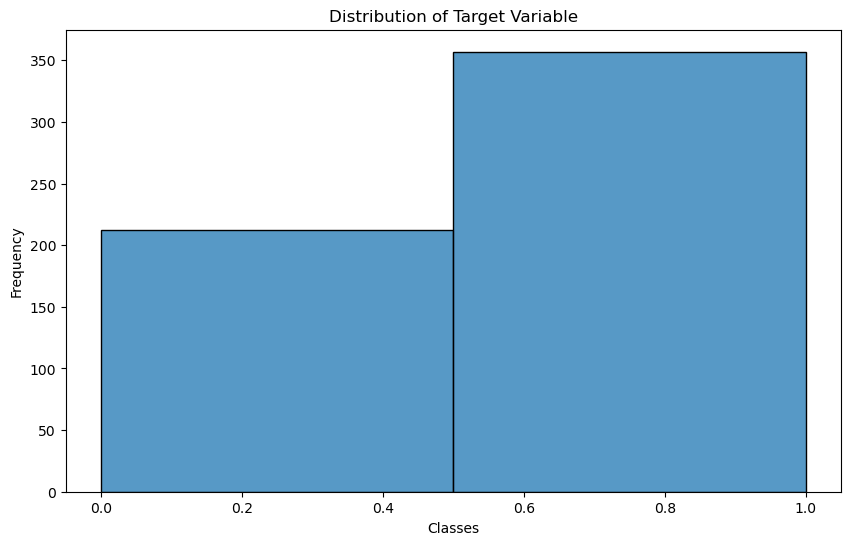

In [223]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(df.target, kde=False, bins=2)
plt.title("Distribution of Target Variable")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()

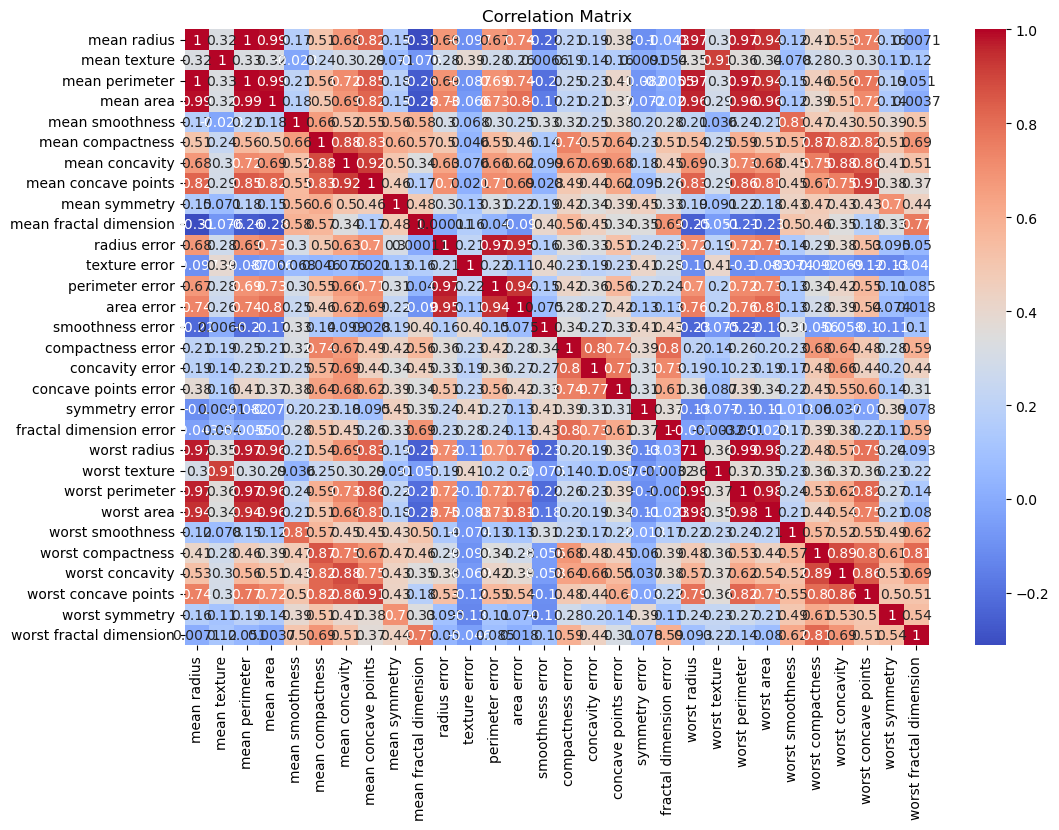

In [225]:
# Correlation matrix
corr_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [226]:
# Split dataset into training and testing sets
X = dataset
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [229]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Cross-validation scores: [0.975      0.975      1.         0.96202532 0.96202532]
Mean cross-validation score: 0.9748101265822784
Mean Squared Error: 0.017543859649122806
R2 Score: 0.9246031746031746


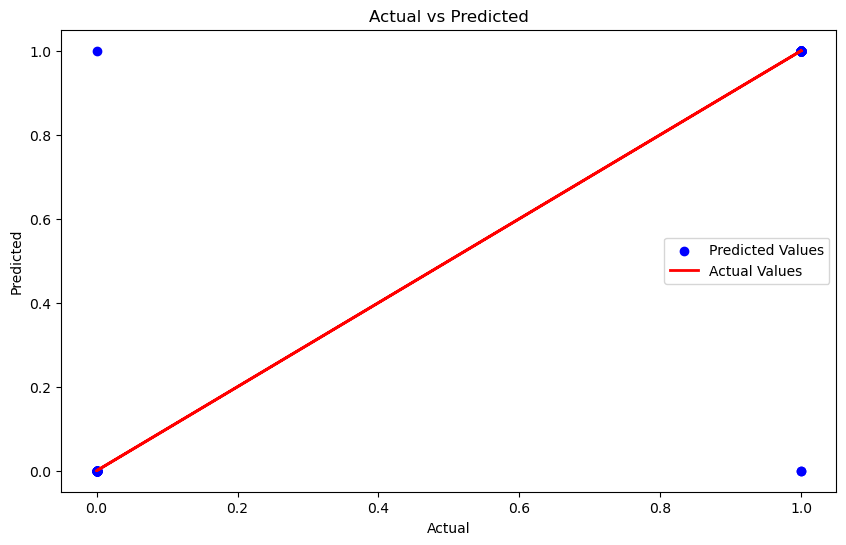

Confusion Matrix:
 [[ 62   1]
 [  2 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



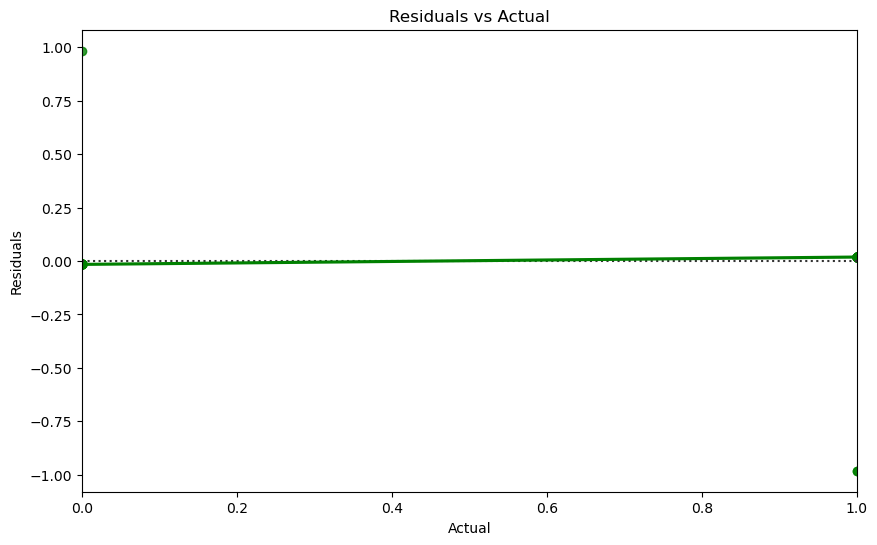

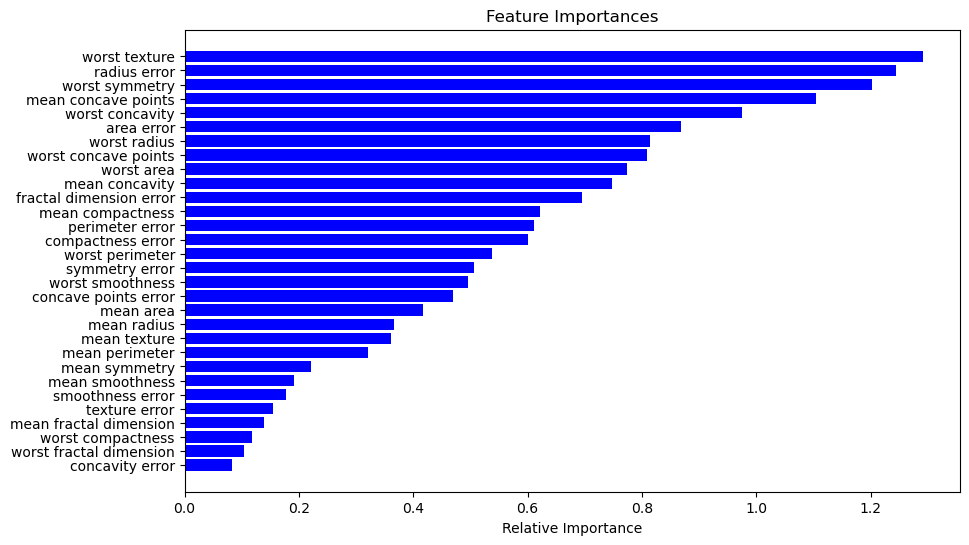

In [231]:
# Logistic Regression
regression = LogisticRegression(max_iter=1000)
regression.fit(X_train, y_train)
cv_scores = cross_val_score(regression, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
y_pred = regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Actual Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
y_pred_class = [1 if pred > 0.5 else 0 for pred in y_pred]
cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)
report = classification_report(y_test, y_pred_class)
print("Classification Report:\n", report)
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='green')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual')
plt.show()
importances = np.abs(regression.coef_[0])
feature_names = dataset.columns
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [233]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict
y_pred_rf = rf_clf.predict(X_test)

# Print Evaluation Metrics
print("Random Forest Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier:
Confusion Matrix:
 [[ 59   4]
 [  1 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



Bagging Classifier:
Confusion Matrix:
 [[ 62   1]
 [  2 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



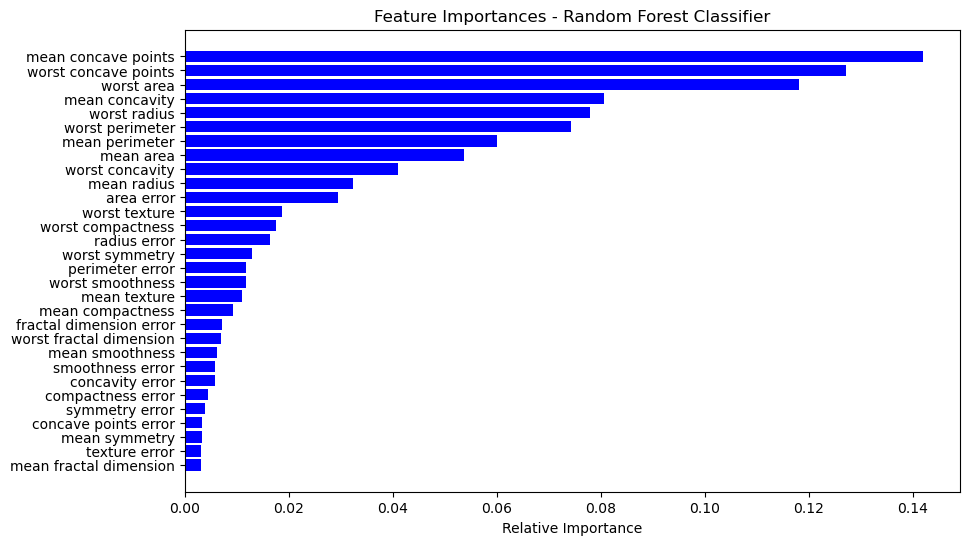

In [235]:
# Bagging Classifier
bagging_classifier = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)
print("Bagging Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))
print("Classification Report:\n", classification_report(y_test, y_pred_bagging))
importances_rf = rf_classifier.feature_importances_
indices_rf = np.argsort(importances_rf)
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest Classifier")
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], color='b', align='center')
plt.yticks(range(len(indices_rf)), [feature_names[i] for i in indices_rf])
plt.xlabel("Relative Importance")
plt.show()


In [237]:
# MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_classifier.fit(X_train, y_train)
y_pred_mlp = mlp_classifier.predict(X_test)
print("MLP Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

MLP Classifier:
Confusion Matrix:
 [[ 61   2]
 [  1 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



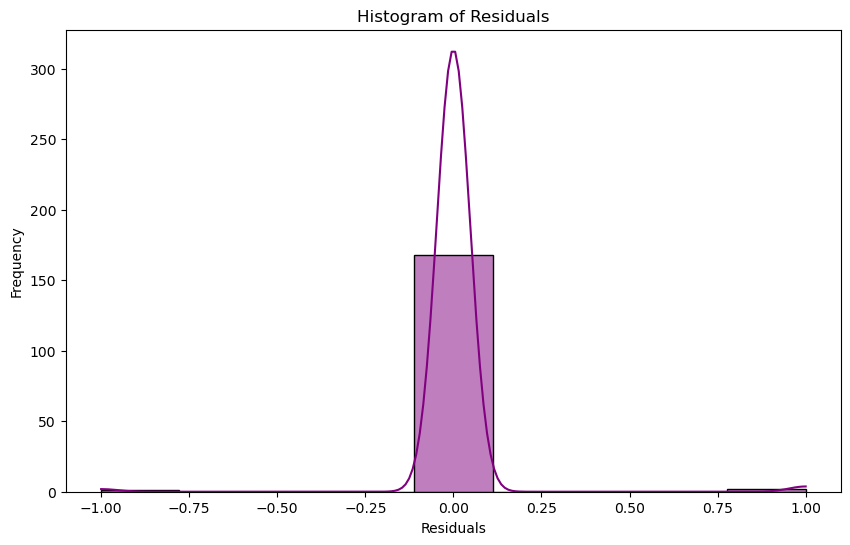

In [239]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [185]:
# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [187]:
# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

In [243]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [245]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, roc_auc, conf_matrix


In [247]:
# Initialize and fit models
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_probs = log_model.predict_proba(X_test)[:, 1]
log_acc, log_roc, log_conf = evaluate_model(log_model, X_train.numpy(), X_test.numpy(), y_train.numpy(), y_test.numpy())

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_acc, rf_roc, rf_conf = evaluate_model(rf_model, X_train.numpy(), X_test.numpy(), y_train.numpy(), y_test.numpy())

In [249]:
# Scale data for MLP
X_train_scaled = scaler.fit_transform(X_train.numpy())
X_test_scaled = scaler.transform(X_test.numpy())

mlp_model = MLPClassifier(max_iter=500)
mlp_model.fit(X_train_scaled, y_train.numpy())
mlp_probs = mlp_model.predict_proba(X_test_scaled)[:, 1]
mlp_acc, mlp_roc, mlp_conf = evaluate_model(mlp_model, X_train_scaled, X_test_scaled, y_train.numpy(), y_test.numpy())

In [251]:
# Bagging Classifier
bagging = BaggingClassifier(n_estimators=50)
bag_acc, bag_roc, bag_conf = evaluate_model(bagging, X_train.numpy(), X_test.numpy(), y_train.numpy(), y_test.numpy())

In [253]:
# Define CNN Model
class BreastCancerCNN(nn.Module):
    def __init__(self, input_dim):
        super(BreastCancerCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(32 * (input_dim // 2), 64)
        self.fc2 = nn.Linear(64, 2)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [255]:
# Initialize and train CNN
input_dim = X.shape[1]
model = BreastCancerCNN(input_dim)

In [257]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [277]:
# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 0.0150
Epoch 2/20, Loss: 0.0148
Epoch 3/20, Loss: 0.0121
Epoch 4/20, Loss: 0.0108
Epoch 5/20, Loss: 0.0110
Epoch 6/20, Loss: 0.0082
Epoch 7/20, Loss: 0.0078
Epoch 8/20, Loss: 0.0066
Epoch 9/20, Loss: 0.0051
Epoch 10/20, Loss: 0.0039
Epoch 11/20, Loss: 0.0048
Epoch 12/20, Loss: 0.0051
Epoch 13/20, Loss: 0.0096
Epoch 14/20, Loss: 0.0263
Epoch 15/20, Loss: 0.0163
Epoch 16/20, Loss: 0.0122
Epoch 17/20, Loss: 0.0072
Epoch 18/20, Loss: 0.0052
Epoch 19/20, Loss: 0.0043
Epoch 20/20, Loss: 0.0019


In [279]:
# Evaluate CNN Model
y_pred, y_true, y_probs = [], [], []

model.eval()
with torch.no_grad():
    for X_batch, y_batch in DataLoader(TensorDataset(X_test, y_test), batch_size=16, shuffle=False):
        outputs = model(X_batch)
        probs = torch.softmax(outputs, dim=1)[:, 1]
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(y_batch.numpy())
        y_probs.extend(probs.numpy())

cnn_acc = accuracy_score(y_true, y_pred)
cnn_roc = roc_auc_score(y_true, y_probs)
cnn_conf = confusion_matrix(y_true, y_pred)
cnn_report = classification_report(y_true, y_pred, output_dict=True)

In [281]:
# Model Comparison
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "MLP", "Bagging Classifier", "CNN (PyTorch)"],
    "Accuracy": [log_acc, rf_acc, mlp_acc, bag_acc, cnn_acc],
    "ROC AUC": [log_roc, rf_roc, mlp_roc, bag_roc, cnn_roc]
})

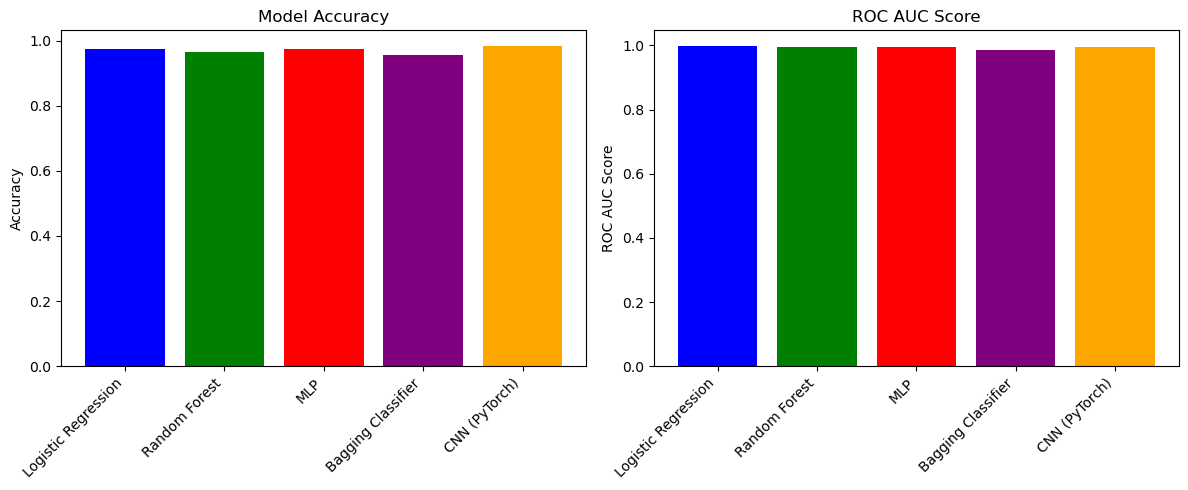

In [283]:
# Plot Model Performance
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(comparison_df["Model"], comparison_df["Accuracy"], color=['blue', 'green', 'red', 'purple', 'orange'])
ax[0].set_title("Model Accuracy")
ax[0].set_ylabel("Accuracy")
ax[0].set_xticks(range(len(comparison_df["Model"])))
ax[0].set_xticklabels(comparison_df["Model"], rotation=45, ha="right")

ax[1].bar(comparison_df["Model"], comparison_df["ROC AUC"], color=['blue', 'green', 'red', 'purple', 'orange'])
ax[1].set_title("ROC AUC Score")
ax[1].set_ylabel("ROC AUC Score")
ax[1].set_xticks(range(len(comparison_df["Model"])))
ax[1].set_xticklabels(comparison_df["Model"], rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [285]:
# Accuracy Bar Chart
ax[0].bar(comparison_df["Model"], comparison_df["Accuracy"], color=['blue', 'green', 'red', 'purple', 'orange'])
ax[0].set_title("Model Accuracy")
ax[0].set_ylabel("Accuracy")
ax[0].set_xticklabels(comparison_df["Model"], rotation=45, ha="right")

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Random Forest'),
 Text(2, 0, 'MLP'),
 Text(3, 0, 'Bagging Classifier'),
 Text(4, 0, 'CNN (PyTorch)')]

In [287]:
# ROC AUC Bar Chart
ax[1].bar(comparison_df["Model"], comparison_df["ROC AUC"], color=['blue', 'green', 'red', 'purple', 'orange'])
ax[1].set_title("ROC AUC Score")
ax[1].set_ylabel("ROC AUC Score")
ax[1].set_xticklabels(comparison_df["Model"], rotation=45, ha="right")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [289]:
# Compute performance metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
conf_matrix = confusion_matrix(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)
report = classification_report(y_true, y_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Classification Report:\n{report}")

Confusion Matrix:
[[41  2]
 [ 0 71]]
ROC AUC Score: 0.9767
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [293]:
# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9825


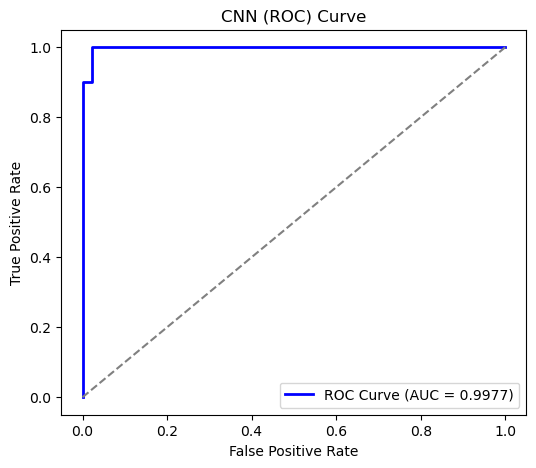

In [315]:
# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("CNN (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [317]:
# ROC curves
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

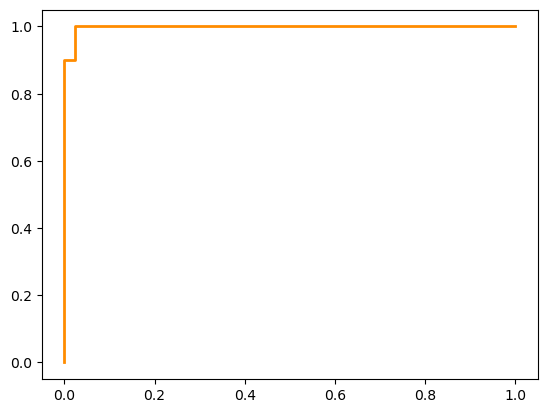

In [319]:
# ROC curve for Logistic Regression
y_pred_prob = regression.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc)

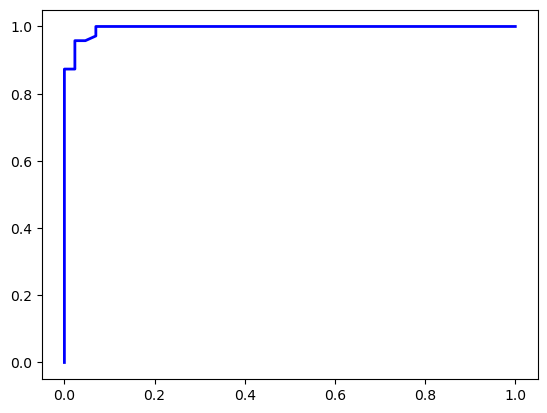

In [321]:
# ROC curve for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)

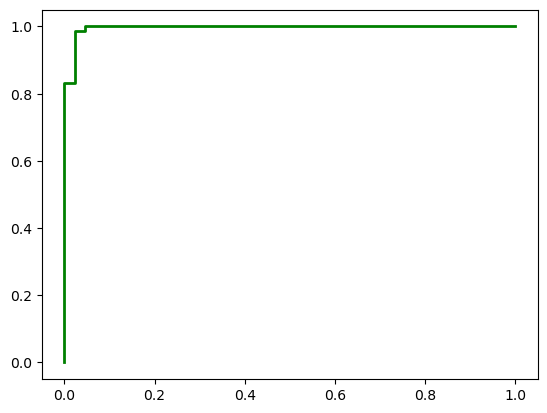

In [323]:
# ROC curve for MLP Classifier
y_pred_mlp_prob = mlp_classifier.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_mlp_prob)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
plt.plot(fpr_mlp, tpr_mlp, color='green', lw=2, label='MLP Classifier (area = %0.2f)' % roc_auc_mlp)

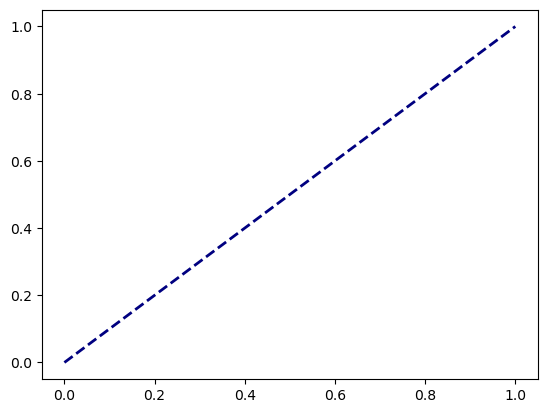

In [325]:
# Plot diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

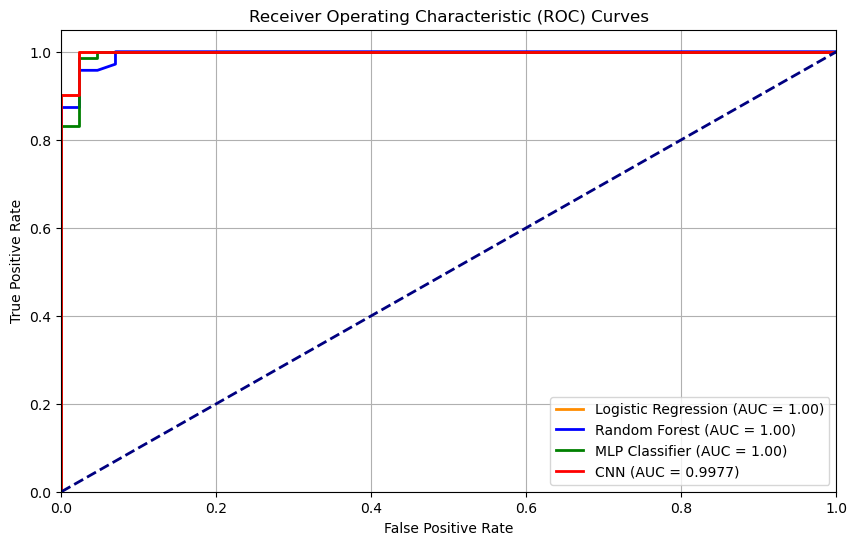

In [327]:
# Required Imports
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier

# Train the MLP Classifier (if not already trained)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_clf.fit(X_train, y_train)

# Compute predicted probabilities for all models
y_pred_prob_lr = regression.predict_proba(X_test)[:, 1]  # Logistic Regression
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]  # Random Forest
y_pred_prob_mlp = mlp_clf.predict_proba(X_test)[:, 1]  # MLP Classifier

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)  # Logistic Regression
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)  # Random Forest
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_prob_mlp)  # MLP Classifier

# Compute AUC scores
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_mlp, tpr_mlp, color='green', lw=2, label=f'MLP Classifier (AUC = {roc_auc_mlp:.2f})')
plt.plot(fpr, tpr, color='red', lw=2, label=f'CNN (AUC = {roc_auc:.4f})')

# Plot Diagonal Baseline (Random Guess)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Plot Settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid()
plt.show()


                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression  0.973684   0.973719  0.973684  0.973621  0.997380
Random Forest        0.964912   0.965205  0.964912  0.964738  0.995251
MLP Classifier       0.973684   0.973719  0.973684  0.973621  0.995742


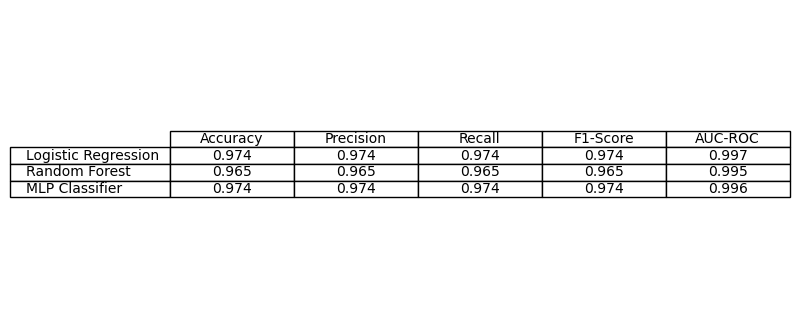

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# 1️⃣ Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# 2️⃣ Train Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# 3️⃣ Train MLP Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_clf.fit(X_train, y_train)

# Dictionary to store model results
results = {}

# Function to evaluate models
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Compute performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Compute AUC-ROC only if predict_proba is available
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for positive class
        auc_roc = roc_auc_score(y_test, y_pred_proba)
    else:
        auc_roc = np.nan  # Not applicable for models without probability prediction

    # Store results in dictionary
    results[name] = [accuracy, precision, recall, f1, auc_roc]

# Evaluate all models
evaluate_model("Logistic Regression", log_reg, X_test, y_test)
evaluate_model("Random Forest", rf_classifier, X_test, y_test)
evaluate_model("MLP Classifier", mlp_clf, X_test, y_test)

# Convert results to DataFrame
metrics_table = pd.DataFrame.from_dict(results, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"])

# Display the table
print(metrics_table)

# Optional: Pretty display using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=metrics_table.round(3).values, colLabels=metrics_table.columns, rowLabels=metrics_table.index, cellLoc='center', loc='center')

plt.show()


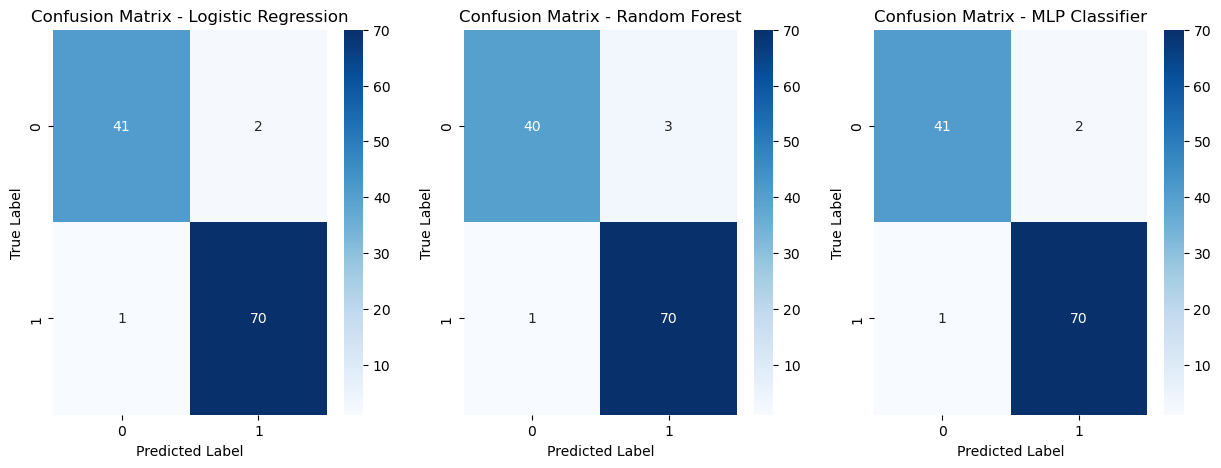

In [331]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_classifier,
    "MLP Classifier": mlp_clf
}

plt.figure(figsize=(15, 5))
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.show()
